# 데이터 불러오기 및 간단한 전처리

In [1]:
import pandas as pd

distribution_centers = pd.read_parquet('../dataset/Looker Ecommerce BigQuery Dataset/Optimization/distribution_centers_optimized.parquet')
# events_file = pd.read_parquet('../dataset/Looker Ecommerce BigQuery Dataset/Optimization/events_optimized.parquet')
inventory_items = pd.read_parquet('../dataset/Looker Ecommerce BigQuery Dataset/Optimization/inventory_items_optimized.parquet')
orders = pd.read_parquet('../dataset/Looker Ecommerce BigQuery Dataset/Optimization/orders_optimized.parquet')
order_items = pd.read_parquet('../dataset/Looker Ecommerce BigQuery Dataset/Optimization/order_items_optimized.parquet')
products = pd.read_parquet('../dataset/Looker Ecommerce BigQuery Dataset/Optimization/products_optimized.parquet')
users = pd.read_parquet('../dataset/Looker Ecommerce BigQuery Dataset/Optimization/users_optimized.parquet')
def events_read():    
    events1 = pd.read_parquet("../dataset/Looker Ecommerce BigQuery Dataset/Optimization/events_optimized_divided1.parquet")
    events2 = pd.read_parquet("../dataset/Looker Ecommerce BigQuery Dataset/Optimization/events_optimized_divided2.parquet")
    events = pd.concat([events1, events2]).sort_index()
    return events
events = events_read()

In [4]:
# 예측확인용으로 날짜 필터링해서 일부 남겨두기 용
use_standard_date = pd.to_datetime('2023-12-01 00:00:00.000000')
use_standard_date = use_standard_date.tz_localize('UTC')
order_items_extracted = order_items[order_items['created_at'] < use_standard_date]

# 구매건만 남기기
order_items_extracted = order_items_extracted[(order_items_extracted['status']!="Returned") & (order_items_extracted['status'] != "Cancelled")]

In [6]:
full_df= order_items_extracted.merge(products.drop(['cost', 'retail_price', 'sku', 'distribution_center_id'], axis=1), on='product_id')

In [7]:
full_df = full_df.merge(users[['user_id', 'age', 'gender', 'user_traffic_source', 'user_created_at']], on='user_id')

In [8]:
# 나이를 10살 단위로 구간화
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대']
full_df = full_df.assign(age_range=pd.cut(full_df['age'], bins=bins, labels=labels, right=False))


In [32]:
full_df.groupby('category')['order_item_id'].count().nlargest(5)

category
Intimates                        8623
Jeans                            8206
Tops & Tees                      7699
Fashion Hoodies & Sweatshirts    7626
Swim                             7381
Name: order_item_id, dtype: int64

In [10]:
full_df.groupby('category')['order_item_id'].count().sort_values(ascending=False)

category
Intimates                        8623
Jeans                            8206
Tops & Tees                      7699
Fashion Hoodies & Sweatshirts    7626
Swim                             7381
Sweaters                         7189
Sleep & Lounge                   7186
Shorts                           7109
Accessories                      6320
Active                           5829
Outerwear & Coats                5748
Underwear                        4834
Pants                            4712
Socks                            4096
Dresses                          3530
Maternity                        3326
Suits & Sport Coats              3309
Plus                             2800
Socks & Hosiery                  2442
Pants & Capris                   2171
Leggings                         2072
Blazers & Jackets                2071
Skirts                           1382
Suits                             648
Jumpsuits & Rompers               592
Clothing Sets                     138
Nam

# 그래프

In [17]:
import plotly.express as px
fig = px.bar(full_df.groupby('category')['order_item_id'].count().sort_values(ascending=False))
fig.show()

In [30]:
pd.DataFrame(full_df.groupby(['gender', 'category'])['order_item_id'].count()).sort_values(['gender', 'order_item_id'], ascending=False)

order_item_id
gender category                                    
M      Jeans                                   4981
       Tops & Tees                             4859
       Underwear                               4834
       Pants                                   4712
       Sweaters                                4417
       Fashion Hoodies & Sweatshirts           4397
       Swim                                    4137
       Shorts                                  4132
       Sleep & Lounge                          4110
       Socks                                   4096
       Accessories                             3572
       Outerwear & Coats                       3525
       Suits & Sport Coats                     3309
       Active                                  3307
       Blazers & Jackets                          0
       Clothing Sets                              0
       Dresses                                    0
       Intimates                                  0
       Jumpsuits & Rompers                        0
       Leggings                                   0
       Maternity                                  0
       Pants & Capris                             0
       Plus                                       0
       Skirts                                     0
       Socks & Hosiery                            0
       Suits                                      0
F      Intimates                               8623
       Dresses                                 3530
       Maternity                               3326
       Swim                                    3244
       Fashion Hoodies & Sweatshirts           3229
       Jeans                                   3225
       Sleep & Lounge                          3076
       Shorts                                  2977
       Tops & Tees                             2840
       Plus                                    2800
       Sweaters                                2772
       Accessories                             2748
       Active                                  2522
       Socks & Hosiery                         2442
       Outerwear & Coats                       2223
       Pants & Capris                          2171
       Leggings                                2072
       Blazers & Jackets                       2071
       Skirts                                  1382
       Suits                                    648
       Jumpsuits & Rompers                      592
       Clothing Sets                            138
       Pants                                      0
       Socks                                      0
       Suits & Sport Coats                        0
       Underwear                                  0

In [36]:
full_df.groupby(['gender', 'category'])['order_item_id'].count().reset_index().sort_values(['gender', 'order_item_id'], ascending=False)

,gender,category,order_item_id
33,M,Jeans,4981
50,M,Tops & Tees,4859
51,M,Underwear,4834
38,M,Pants,4712
48,M,Sweaters,4417
31,M,Fashion Hoodies & Sweatshirts,4397
49,M,Swim,4137
41,M,Shorts,4132
43,M,Sleep & Lounge,4110
44,M,Socks,4096


In [ ]:
# import plotly.express as px
# fig = px.bar(pd.DataFrame(full_df.groupby(['gender', 'category'])['order_item_id'].count()).sort_values(['gender', 'order_item_id'], ascending=False))
# fig.show()

<Axes: xlabel='gender', ylabel='order_item_id'>

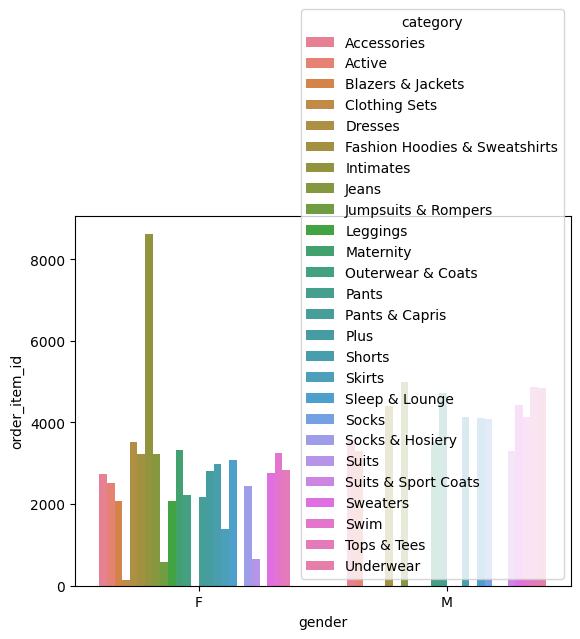

In [40]:
import seaborn as sns
sns.barplot(
    x='gender', y='order_item_id', hue='category',
    data=full_df.groupby(['gender', 'category'])['order_item_id'].count().reset_index().sort_values(['gender', 'order_item_id'], ascending=False))

[15.  5.]


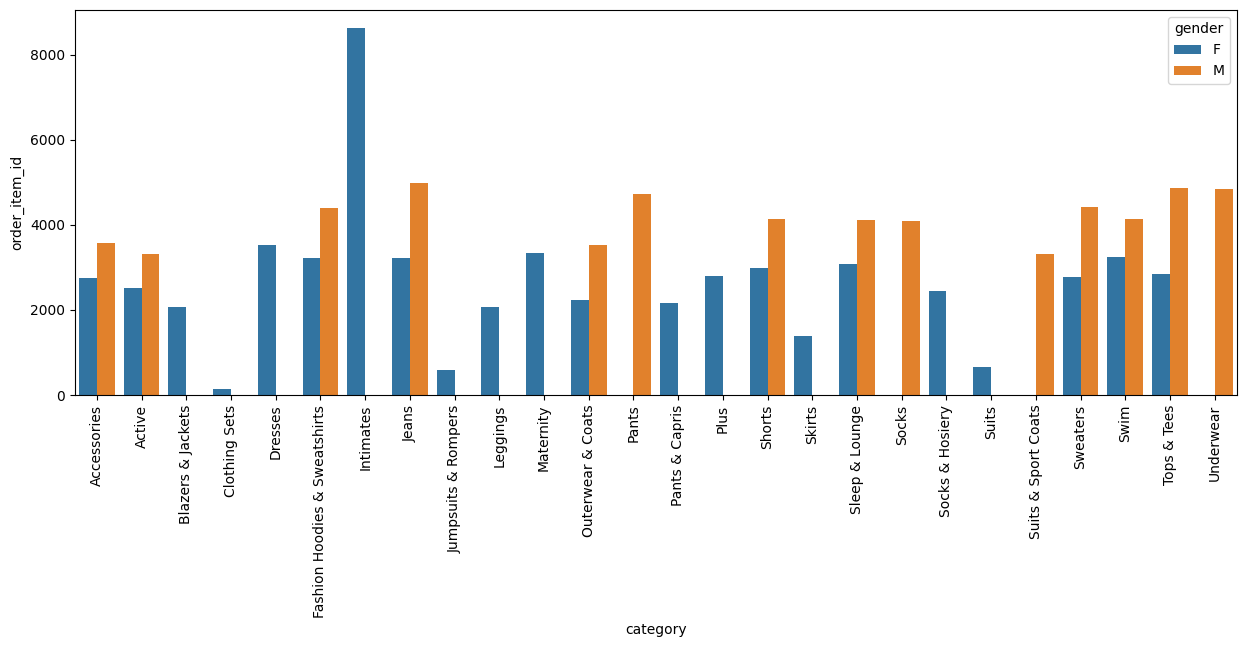

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))  # 가로 10, 세로 6인치로 그래프 크기 설정
# 바 그래프 그리기
sns.barplot(
    x='category', y='order_item_id', hue='gender', 
    data=full_df.groupby(['gender', 'category'])['order_item_id'].count().reset_index().sort_values(['gender', 'order_item_id'], ascending=False))
plt.xticks(rotation=90)  # x축 레이블 회전
print(plt.gcf().get_size_inches())
plt.show()

[15.  5.]


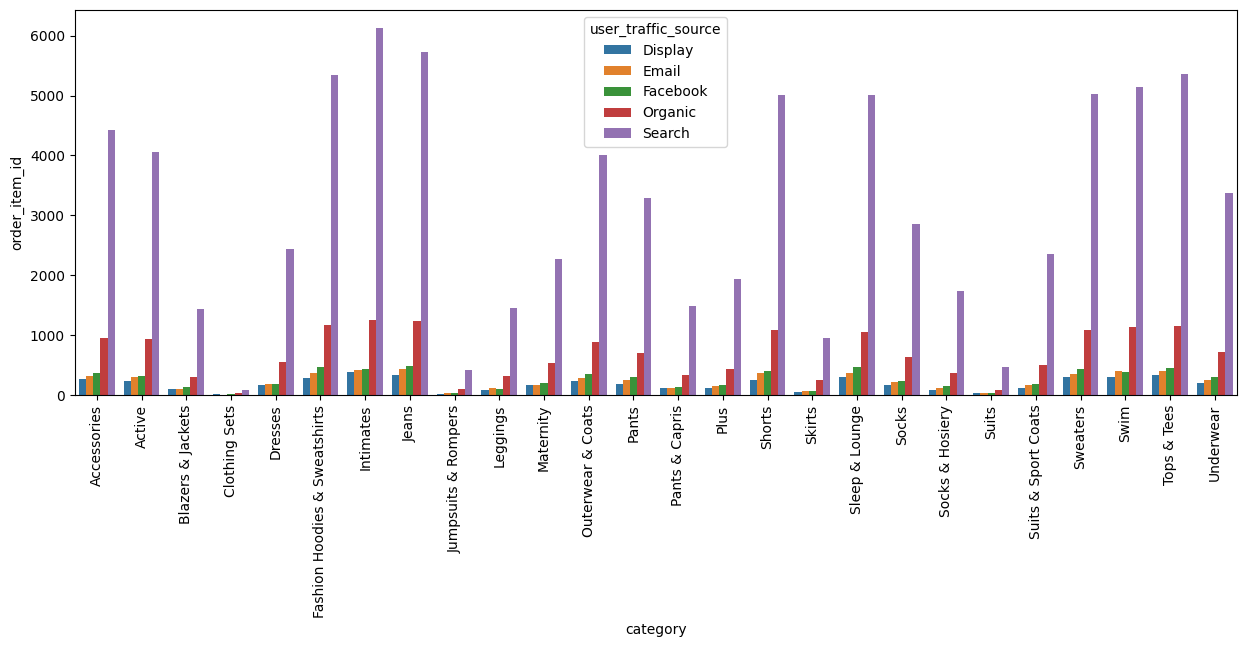

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))  # 가로 10, 세로 6인치로 그래프 크기 설정
# 바 그래프 그리기
sns.barplot(
    x='category', y='order_item_id', hue='', 
    data=full_df.groupby(['', 'category'])['order_item_id'].count().reset_index().sort_values(['', 'order_item_id'], ascending=False))
plt.xticks(rotation=90)  # x축 레이블 회전
print(plt.gcf().get_size_inches())
plt.show()

# 중간 테스트

In [67]:
full_df.groupby(['gender', 'category'])['order_item_id'].count()

gender  category                     
F       Accessories                      2748
        Active                           2522
        Blazers & Jackets                2071
        Clothing Sets                     138
        Dresses                          3530
        Fashion Hoodies & Sweatshirts    3229
        Intimates                        8623
        Jeans                            3225
        Jumpsuits & Rompers               592
        Leggings                         2072
        Maternity                        3326
        Outerwear & Coats                2223
        Pants                               0
        Pants & Capris                   2171
        Plus                             2800
        Shorts                           2977
        Skirts                           1382
        Sleep & Lounge                   3076
        Socks                               0
        Socks & Hosiery                  2442
        Suits                             

In [68]:
full_df.groupby(['gender'])['order_item_id'].count()

gender
F    58651
M    58388
Name: order_item_id, dtype: int64

In [73]:
(full_df.groupby(['gender', 'category'])['order_item_id'].count()/
 full_df.groupby(['gender'])['order_item_id'].count() *100).reset_index().sort_values(['gender', 'order_item_id'], ascending=False)

,gender,category,order_item_id
33,M,Jeans,8.530863
50,M,Tops & Tees,8.321915
51,M,Underwear,8.279098
38,M,Pants,8.070151
48,M,Sweaters,7.564911
31,M,Fashion Hoodies & Sweatshirts,7.530657
49,M,Swim,7.085360
41,M,Shorts,7.076797
43,M,Sleep & Lounge,7.039118
44,M,Socks,7.015140


In [75]:
(full_df.groupby(['user_traffic_source', 'category'])['order_item_id'].count()/
 full_df.groupby(['user_traffic_source'])['order_item_id'].count() *100).reset_index().sort_values(['user_traffic_source', 'order_item_id'], ascending=False).T

,110,111,128,109,127,126,119,121,104,105,...,21,14,13,2,19,9,16,20,8,3
user_traffic_source,Search,Search,Search,Search,Search,Search,Search,Search,Search,Search,...,Display,Display,Display,Display,Display,Display,Display,Display,Display,Display
category,Intimates,Jeans,Tops & Tees,Fashion Hoodies & Sweatshirts,Swim,Sweaters,Shorts,Sleep & Lounge,Accessories,Active,...,Suits & Sport Coats,Plus,Pants & Capris,Blazers & Jackets,Socks & Hosiery,Leggings,Skirts,Suits,Jumpsuits & Rompers,Clothing Sets
order_item_id,7.489547,7.009072,6.560383,6.535932,6.296305,6.145928,6.127589,6.125144,5.407487,4.962467,...,2.542551,2.416474,2.248372,1.975205,1.807102,1.723051,0.987602,0.546333,0.357218,0.14709


# 함수

In [12]:
# def feature_compare(col:str, df:pd.DataFrame=full_df, large_n=5):
#     df2 = df.copy()
#     col_category_count = df2.groupby([col, 'category'])['order_item_id'].count()
#     category_total = df2.groupby([col])['order_item_id'].count()
#     result = (col_category_count/category_total * 100).groupby(col).nlargest(large_n)
    
#     return result.reset_index(level=0, drop=True)

#뤼튼 추천 방식
def feature_compare(col:str, df:pd.DataFrame=full_df, large_n=5):
    df2 = df.copy()
    col_category_count = df2.groupby([col, 'category'])['order_item_id'].count()
    category_total = df2.groupby([col])['order_item_id'].count()
    result = (col_category_count/category_total * 100).groupby(level=0).nlargest(large_n).reset_index(level=0, drop=True)
    
    return result

In [28]:
def featrue_compare2(col:str, df:pd.DataFrame=full_df, large_n=5):
    result_series = feature_compare(col=col, df=df, large_n=large_n)
    top_cat_list = result_series.reset_index(level=0, drop=True).index.tolist()
    chunks = [top_cat_list[i:i + 5] for i in range(0, len(top_cat_list), 5)]
    for chunk in chunks:
        print(chunk)

In [36]:
feature_compare('gender', large_n=10)

gender  category                     
F       Intimates                        14.702222
        Dresses                           6.018653
        Maternity                         5.670833
        Swim                              5.531022
        Fashion Hoodies & Sweatshirts     5.505447
        Jeans                             5.498627
        Sleep & Lounge                    5.244582
        Shorts                            5.075787
        Tops & Tees                       4.842202
        Plus                              4.774002
M       Jeans                             8.530863
        Tops & Tees                       8.321915
        Underwear                         8.279098
        Pants                             8.070151
        Sweaters                          7.564911
        Fashion Hoodies & Sweatshirts     7.530657
        Swim                              7.085360
        Shorts                            7.076797
        Sleep & Lounge                    7.

In [116]:
feature_compare('user_traffic_source')

user_traffic_source  category                     
Display              Intimates                        8.047909
                     Jeans                            7.018281
                     Tops & Tees                      6.976256
                     Sweaters                         6.345871
                     Sleep & Lounge                   6.324858
Email                Jeans                            7.351952
                     Intimates                        7.082773
                     Swim                             6.813594
                     Tops & Tees                      6.662180
                     Fashion Hoodies & Sweatshirts    6.275236
Facebook             Jeans                            7.017024
                     Fashion Hoodies & Sweatshirts    6.854182
                     Sleep & Lounge                   6.824574
                     Tops & Tees                      6.750555
                     Intimates                        6.513694
Orga

In [30]:
feature_compare('age_range')

age_range  category                     
10대        Intimates                        7.323120
           Jeans                            6.960778
           Fashion Hoodies & Sweatshirts    6.693789
           Tops & Tees                      6.229737
           Swim                             6.210667
20대        Intimates                        7.385960
           Jeans                            7.157371
           Fashion Hoodies & Sweatshirts    6.547800
           Swim                             6.542721
           Tops & Tees                      6.441126
30대        Intimates                        7.232863
           Jeans                            7.121976
           Tops & Tees                      6.552419
           Fashion Hoodies & Sweatshirts    6.522177
           Swim                             6.471774
40대        Intimates                        7.498999
           Jeans                            6.728074
           Tops & Tees                      6.407689
     

In [29]:
featrue_compare2('user_traffic_source')

['Intimates', 'Jeans', 'Tops & Tees', 'Sweaters', 'Sleep & Lounge']
['Jeans', 'Intimates', 'Swim', 'Tops & Tees', 'Fashion Hoodies & Sweatshirts']
['Jeans', 'Fashion Hoodies & Sweatshirts', 'Sleep & Lounge', 'Tops & Tees', 'Intimates']
['Intimates', 'Jeans', 'Fashion Hoodies & Sweatshirts', 'Tops & Tees', 'Swim']
['Intimates', 'Jeans', 'Tops & Tees', 'Fashion Hoodies & Sweatshirts', 'Swim']


In [31]:
featrue_compare2('age_range')

['Intimates', 'Jeans', 'Fashion Hoodies & Sweatshirts', 'Tops & Tees', 'Swim']
['Intimates', 'Jeans', 'Fashion Hoodies & Sweatshirts', 'Swim', 'Tops & Tees']
['Intimates', 'Jeans', 'Tops & Tees', 'Fashion Hoodies & Sweatshirts', 'Swim']
['Intimates', 'Jeans', 'Tops & Tees', 'Fashion Hoodies & Sweatshirts', 'Swim']
['Intimates', 'Jeans', 'Tops & Tees', 'Fashion Hoodies & Sweatshirts', 'Sleep & Lounge']
['Intimates', 'Jeans', 'Tops & Tees', 'Fashion Hoodies & Sweatshirts', 'Sleep & Lounge']
['Jeans', 'Sweaters', 'Intimates', 'Tops & Tees', 'Swim']


In [33]:
feature_compare('gender', large_n=10)

gender  category                     
F       Intimates                        14.702222
        Dresses                           6.018653
        Maternity                         5.670833
        Swim                              5.531022
        Fashion Hoodies & Sweatshirts     5.505447
        Jeans                             5.498627
        Sleep & Lounge                    5.244582
        Shorts                            5.075787
        Tops & Tees                       4.842202
        Plus                              4.774002
M       Jeans                             8.530863
        Tops & Tees                       8.321915
        Underwear                         8.279098
        Pants                             8.070151
        Sweaters                          7.564911
        Fashion Hoodies & Sweatshirts     7.530657
        Swim                              7.085360
        Shorts                            7.076797
        Sleep & Lounge                    7.